### 민감도와 특이도
- 민감도(TPR, True Positive Rate): 1을 1로 잘 맞춘 비율, 재현율(recall)이라고도 함
- 특이도(FPR, False Positive Rate): 실제값 0을 1로 잘못 예측한 비율

In [1]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=16, n_features=2, n_informative=2,
                           n_redundant=0, random_state=10)

In [2]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression().fit(X, y)
y_hat = model1.predict(X) # 예측값
f_value = model1.decision_function(X) # 판별함수

In [3]:
import numpy as np
import pandas as pd
df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T, columns=['f', 'y_hat', 'y'])

# f값을 내림차순으로 정렬
df.sort_values('f', ascending=False).reset_index(drop=True)

,f,y_hat,y
0,2.471816,1.0,1.0
1,2.100107,1.0,1.0
2,1.465129,1.0,1.0
3,1.293446,1.0,1.0
4,1.285234,1.0,0.0
5,0.908117,1.0,1.0
6,0.901632,1.0,1.0
7,0.164087,1.0,1.0
8,-0.647279,0.0,0.0
9,-0.735501,0.0,0.0


In [4]:
#0을 기준으로 계산한 결과
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_hat, labels=[0,1])

array([[7, 1],
       [1, 7]], dtype=int64)

In [5]:
fpr0 = 1 / (7 + 1) # 0을 1로 잘못 분류한 값(특이도)
tpr0 = 7 / (1 + 7) # 1을 1로 잘 찾아낸 값(민감도, recall)
fpr0, tpr0

(0.125, 0.875)

In [6]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, model1.decision_function(X))
fpr, tpr, thresholds

(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.5  , 0.5  , 1.   ]),
 array([0.   , 0.125, 0.5  , 0.5  , 0.875, 0.875, 1.   , 1.   ]),
 array([ 3.4718164 ,  2.4718164 ,  1.29344604,  1.28523411,  0.16408684,
        -0.9956665 , -1.03203074, -2.9451636 ]))

In [7]:
fpr, tpr, thresholds = roc_curve(y, model1.predict_proba(X)[:,1])
fpr, tpr, thresholds

(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.5  , 0.5  , 1.   ]),
 array([0.   , 0.125, 0.5  , 0.5  , 0.875, 0.875, 1.   , 1.   ]),
 array([1.92214228, 0.92214228, 0.7847299 , 0.78333942, 0.54092992,
        0.26979429, 0.26269059, 0.04996559]))

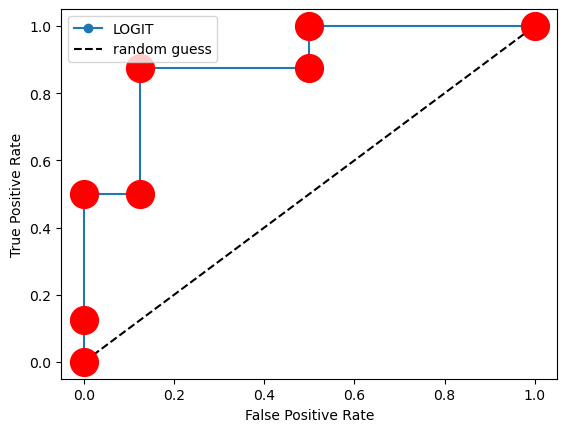

In [8]:
#ROC Curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'o-', label='LOGIT')
plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.plot([fpr], [tpr], 'ro', ms=20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [9]:
#의사결정나무 모델
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier().fit(X, y)
y_hat = model2.predict(X)
# f_value = model2.decision_function(X) => 트리모형에서는 판별함수가 없음.
fpr, tpr, thresholds = roc_curve(y, model2.predict_proba(X)[:,1])
fpr, tpr, thresholds

(array([0., 0., 1.]), array([0., 1., 1.]), array([2., 1., 0.]))

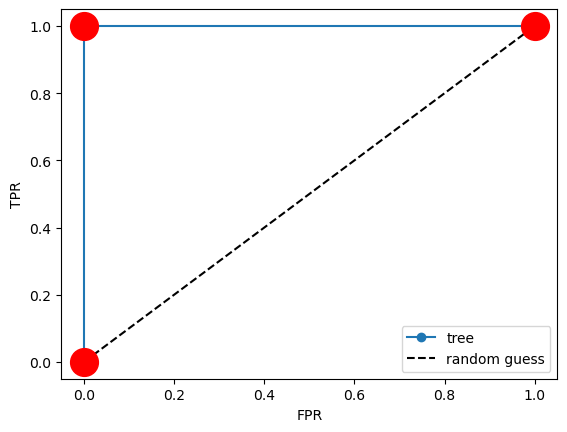

In [10]:
#ROC Curve
plt.plot(fpr, tpr, 'o-', label='tree')
plt.plot([0,1],[0,1],'k--',label='random guess')
plt.plot([fpr], [tpr], 'ro', ms=20)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()